In [15]:
import pandas as pd
from xgboost import XGBRegressor
from mlforecast import MLForecast
from utilsforecast.plotting import plot_series


In [22]:
data = pd.read_csv('../datasets/ETT-small/ETTh1.csv', parse_dates=['date'])
#create id column 
data['unique_id'] = 1
# transform date column into datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
data.rename(columns={'date': 'ds', 'OT': 'y'}, inplace=True)
data

,ds,HUFL,HULL,MUFL,MULL,LUFL,LULL,y,unique_id
0,2016-07-01 00:00:00,5.827,2.009,1.599,0.462,4.203,1.340,30.531000,1
1,2016-07-01 01:00:00,5.693,2.076,1.492,0.426,4.142,1.371,27.787001,1
2,2016-07-01 02:00:00,5.157,1.741,1.279,0.355,3.777,1.218,27.787001,1
3,2016-07-01 03:00:00,5.090,1.942,1.279,0.391,3.807,1.279,25.044001,1
4,2016-07-01 04:00:00,5.358,1.942,1.492,0.462,3.868,1.279,21.948000,1
...,...,...,...,...,...,...,...,...,...
17415,2018-06-26 15:00:00,-1.674,3.550,-5.615,2.132,3.472,1.523,10.904000,1
17416,2018-06-26 16:00:00,-5.492,4.287,-9.132,2.274,3.533,1.675,11.044000,1
17417,2018-06-26 17:00:00,2.813,3.818,-0.817,2.097,3.716,1.523,10.271000,1
17418,2018-06-26 18:00:00,9.243,3.818,5.472,2.097,3.655,1.432,9.778000,1


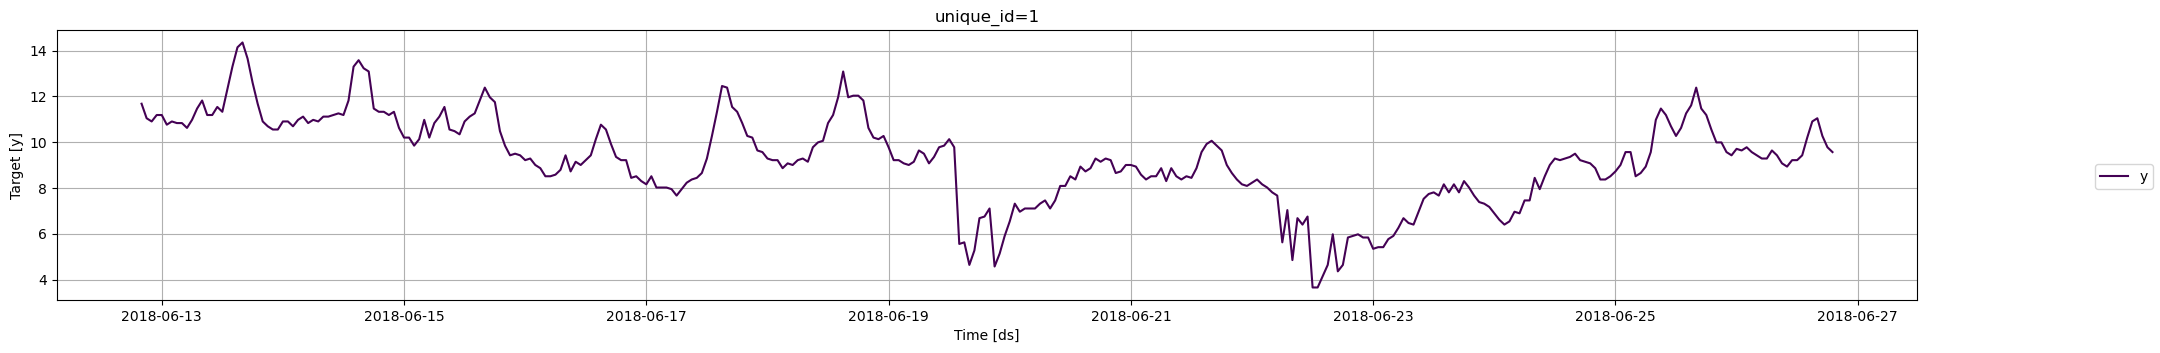

In [23]:
fig = plot_series(data, max_insample_length=24 * 14)
fig

In [41]:
train = data[:8640]
test = data[8640:]

In [26]:
models = [XGBRegressor(objective="reg:squarederror", random_state=0, n_estimators=100)]

In [27]:
fcst = MLForecast(
    models=models,
    freq='H',
    lags=[7, 14]
)

In [32]:
fcst.fit(train)

MLForecast(models=[XGBRegressor], freq=<Hour>, lag_features=['lag7', 'lag14'], date_features=[], num_threads=1)

In [33]:
predictions = fcst.predict(96)

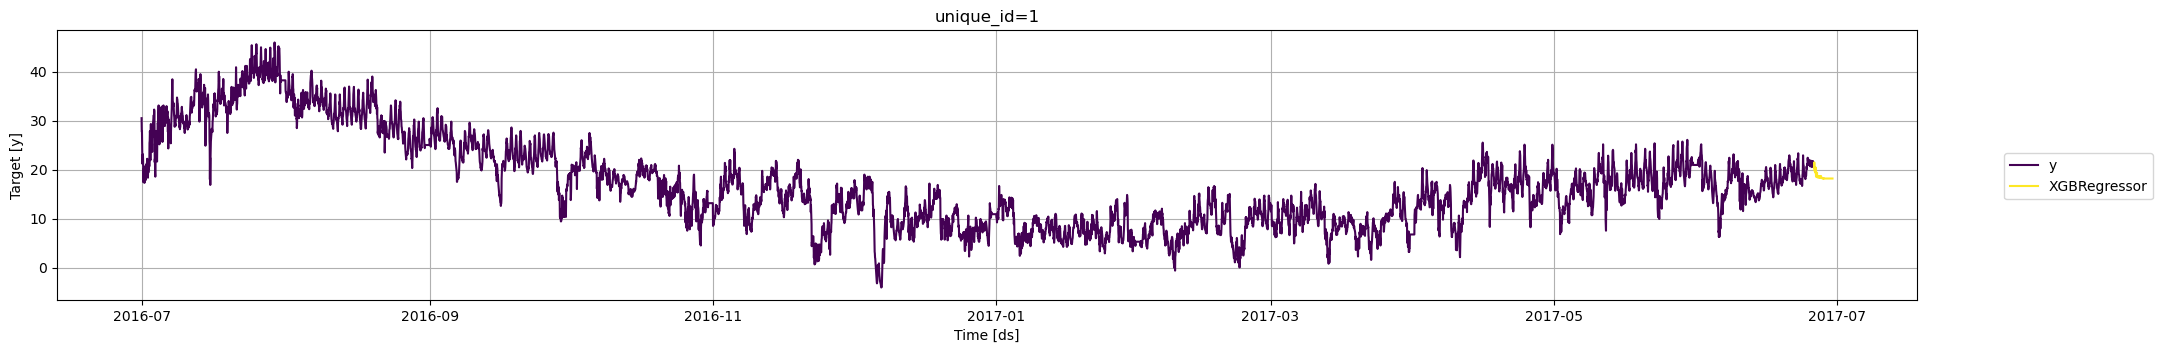

In [35]:
fig = plot_series(train, predictions, max_ids=4, plot_random=False)
fig

In [53]:
#Take all y values and predictions['XGB] from final_test and put them in a list
y_values = test['y'].tolist()
pred_values = predictions['XGBRegressor'].tolist()

In [56]:
# Take just 96 values of y_values
y_values = y_values[:96]

In [57]:
import numpy as np

# Convert lists to numpy arrays
pred_values_array = np.array(pred_values)
y_values_array = np.array(y_values)

# Compute mse and mae
mse = ((pred_values_array - y_values_array) ** 2).mean()
mae = abs(pred_values_array - y_values_array).mean()

print(f"mse: {mse}, mae: {mae}")

mse: 6.602304923374997, mae: 2.124105870723724
